In [1]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import numpy as np
from matplotlib_venn import venn2

## Read BGI input

## Combine info separetely

In [46]:
# input BGI 
bgi = pd.read_csv('input/ReadsNumb_BGI.csv')
bgi['sample_name'] = bgi['name'].str.split('_').str[1]
bgi.rename(columns={"name": "BGI_reads_file", "reads_numb": "BGI_reads_numb"}, inplace=True)
bgi = bgi.sort_values(by=['BGI_reads_numb'])
bgi_unique = bgi.drop_duplicates(subset=['sample_name'], keep='last')

# input BGI part 2
bgi2 = pd.read_csv('input/ReadsNumb_BGI_p2.csv', sep=' ', header=None, names=['Sample', 'BGIp2_reads_numb'])
bgi2['sample_name'] = bgi2['Sample'].str.split('_').str[0]
bgi2 = bgi2.sort_values(by=['BGIp2_reads_numb'])
bgi2_unique = bgi2.drop_duplicates(subset=['sample_name'], keep='last')
bgi2_unique = bgi2_unique[['sample_name','BGIp2_reads_numb']]

# input Illumina
ill = pd.read_csv('input/ReadsNumb_FS.csv')
ill.rename(columns={"nameS": "sample_name", "reads_numb": "Illumina_reads_numb"}, inplace=True)
ill = ill.sort_values(by=['Illumina_reads_numb'])
ill_unique = ill.drop_duplicates(subset=['sample_name'], keep='last')

# merge
rn = bgi_unique.merge(ill_unique, on='sample_name', how='outer')
rn1 = rn.merge(bgi2_unique, on='sample_name', how='outer')

rn1 = rn1[['sample_name', 'BGI_reads_numb', 'BGIp2_reads_numb', 'Illumina_reads_numb']]
rn1.to_excel('results/ReadsNumb_both_sets.xlsx', index=False)

rn1.head()

,sample_name,BGI_reads_numb,BGIp2_reads_numb,Illumina_reads_numb
0,V9OLUV,463900.0,NaN,623330.0
1,VNB54O,840010.0,NaN,16074287.0
2,VV5SGU,1013097.0,NaN,621436.0
3,VORP1W,19993536.0,NaN,13233320.0
4,V3PRGW,20274738.0,NaN,14875113.0


## Combine BGIs in one cohort 

In [47]:
## Combine info separetely
bgi_unique = bgi_unique.drop(columns=['BGI_reads_file'])
bgi2_unique.rename(columns={"BGIp2_reads_numb": "BGI_reads_numb"}, inplace=True)
# combine with bgi_unique
bgi_both = bgi_unique.append(bgi2_unique, ignore_index=True)


/var/folders/5j/pvj6k02n3mn9ztpn77vjtfzw0000gn/T/ipykernel_15470/4266661825.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bgi_both = bgi_unique.append(bgi2_unique, ignore_index=True)


In [48]:
mrg_both = bgi_both.merge(ill_unique, on='sample_name', how='outer')

mrg_both.to_excel('results/ReadsNumb_both_sets1.xlsx', index=False)
mrg_both

,BGI_reads_numb,sample_name,Illumina_reads_numb
0,463900.0,V9OLUV,623330.0
1,840010.0,VNB54O,16074287.0
2,1013097.0,VV5SGU,621436.0
3,19993536.0,VORP1W,13233320.0
4,20274738.0,V3PRGW,14875113.0
...,...,...,...
2538,NaN,VDL8IX,19715758.0
2539,NaN,MB20.E6,19778060.0
2540,NaN,VI05UC,20240695.0
2541,NaN,VZPE35,20282586.0


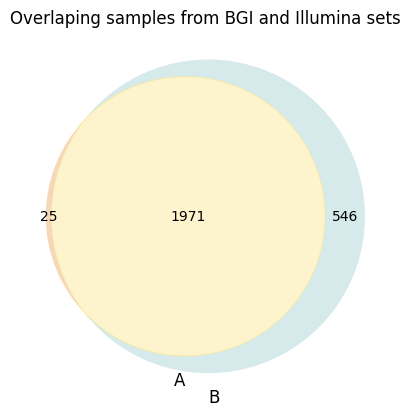

In [40]:
smpls_bgi = set(bgi_both['sample_name'])
#smpls_bgi = set(bgi_unique['sample_name']).union(bgi2_unique['sample_name'])

smpls_illumina = set(ill_unique['sample_name'])
intersection = smpls_bgi.intersection(smpls_illumina)
bgi_only = smpls_bgi.difference(smpls_illumina)
illumina_only = smpls_illumina.difference(smpls_bgi)

v = venn2(subsets=(len(bgi_only), len(illumina_only), len(intersection)), set_colors=('#E99B53', '#99CCCD'))
v.get_patch_by_id('11').set_color('#FAE483')
plt.title('Overlaping samples from BGI and Illumina sets')

plt.savefig('results/venn2.png', dpi=300, bbox_inches='tight')
plt.savefig('results/venn2.svg', bbox_inches='tight')


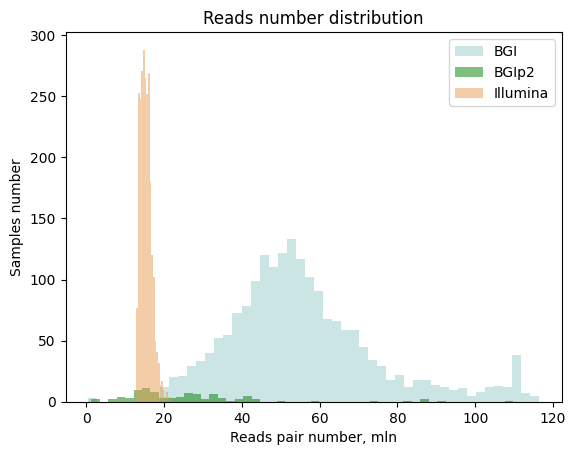

In [54]:
plt.hist(bgi_unique['BGI_reads_numb']/1000000, bins=50, color='#99CCCD', alpha=0.5, label='BGI')
plt.hist(bgi2_unique['BGI_reads_numb']/1000000, bins=50, color='green', alpha=0.5, label='BGIp2')
plt.hist(ill_unique['Illumina_reads_numb']/1000000, bins=50, color='#E99B53', alpha=0.5, label='Illumina')
plt.legend(loc='upper right')
plt.title('Reads number distribution')
plt.xlabel('Reads pair number, mln')
plt.ylabel('Samples number')
plt.savefig('results/ReadsNumb_distribution.png', dpi=300, bbox_inches='tight')
plt.savefig('results/ReadsNumb_distribution.svg', bbox_inches='tight')

# Metadata

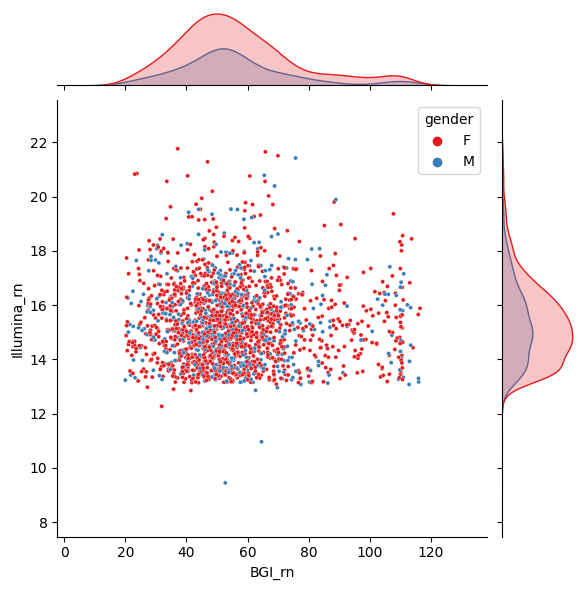

In [78]:
sns.jointplot(data=both, x="BGI_rn", y="Illumina_rn", hue='gender', s=9,palette='Set1')
plt.savefig('results/ReadsNumb_both_sets.png', dpi=300, bbox_inches='tight')
plt.savefig('results/ReadsNumb_both_sets.svg', bbox_inches='tight')

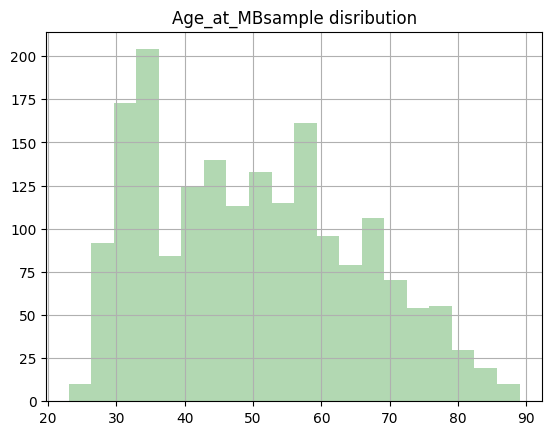

In [80]:
both['Age_at_MBsample'].hist(bins=20, alpha=0.3, color='green')
plt.title('Age_at_MBsample disribution')

plt.savefig('results/Age.png', dpi=300)

In [ ]:
sns.jointplot(data=mrg_both, x="BGI_rn", y="Illumina_rn", hue='gender', s=9,palette='Set1')
plt.savefig('results/ReadsNumb_both_sets.png', dpi=300, bbox_inches='tight')
plt.savefig('results/ReadsNumb_both_sets.svg', bbox_inches='tight')

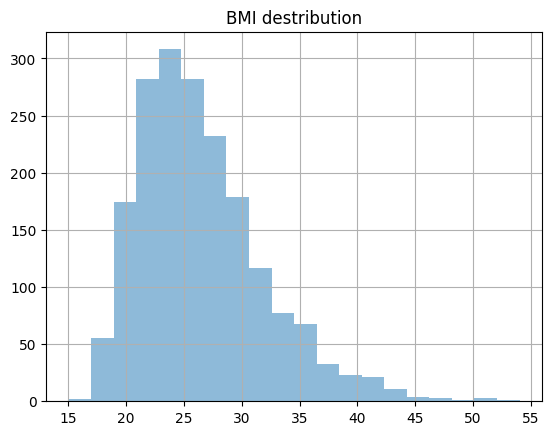

In [79]:
both['BMI'].hist(bins=20, alpha=0.5)
plt.title('BMI destribution')

plt.savefig('results/BMI.png', dpi=300)

In [5]:
meta = pd.read_excel('input/MataData.xlsx')
meta = meta[['skood', 'gender', 'Age_at_MBsample', 'BMI', 'WHR','samplingSeason', 'BP_systolic', 'birthPlace_typeCity','seasonableAllergy_code',
             'sensitivityGlutenSubject_code','sensitivityLactoseSubject_code','hasPets','alcohol_has_used','has_smoked_lastYear',
             'doesPhysicalExercise','mental_health_status_ok','health_status_ok','antibiotics_history_cont','antidepressants_history_cont']]

sv = pd.read_excel('input/scode_vcode.xlsx')
meta = meta.merge(sv, on='skood', how='left')
meta.to_excel('results/meta.xlsx', index=False)

meta.head()

,skood,gender,Age_at_MBsample,BMI,WHR,samplingSeason,BP_systolic,birthPlace_typeCity,seasonableAllergy_code,sensitivityGlutenSubject_code,sensitivityLactoseSubject_code,hasPets,alcohol_has_used,has_smoked_lastYear,doesPhysicalExercise,mental_health_status_ok,health_status_ok,antibiotics_history_cont,antidepressants_history_cont,vkood
0,EGVD049674,1,35.0,20.24,0.72,Spring,112.0,1.0,1.0,4.0,4.0,0.0,1.0,NaN,1,1,1,0.0,0.0,VT2F0R
1,EGVD046120,1,36.0,18.89,0.75,Spring,118.0,1.0,2.0,4.0,4.0,0.0,1.0,NaN,1,1,1,6.0,0.0,V6QVQM
2,EGVD004311,1,59.0,32.79,0.85,Winter,169.0,1.0,2.0,4.0,4.0,1.0,1.0,NaN,1,1,0,NaN,0.0,VB6RZH
3,EGVD027494,0,77.0,24.98,0.94,Winter,138.0,0.0,2.0,1.0,1.0,1.0,1.0,NaN,1,0,0,NaN,NaN,VE954R
4,EGVD026699,1,74.0,26.09,0.77,Winter,171.0,0.0,2.0,5.0,4.0,1.0,1.0,NaN,0,1,1,NaN,NaN,VY9T1U


In [58]:
# merge meta and rn
mrg = meta.merge(rn, left_on='vkood', right_on='sample_name', how='outer')
mrg.to_excel('results/meta_rn.xlsx', index=False)

mrg.head()

,skood,gender,Age_at_MBsample,BMI,WHR,samplingSeason,BP_systolic,birthPlace_typeCity,seasonableAllergy_code,sensitivityGlutenSubject_code,...,doesPhysicalExercise,mental_health_status_ok,health_status_ok,antibiotics_history_cont,antidepressants_history_cont,vkood,BGI_reads_file,BGI_reads_numb,sample_name,Illumina_reads_numb
0,EGVD049674,1.0,35.0,20.24,0.72,Spring,112.0,1.0,1.0,4.0,...,1.0,1.0,1.0,0.0,0.0,VT2F0R,lab70_VT2F0R_E100015864_L01,47536515.0,VT2F0R,15317512.0
1,EGVD046120,1.0,36.0,18.89,0.75,Spring,118.0,1.0,2.0,4.0,...,1.0,1.0,1.0,6.0,0.0,V6QVQM,lab67_V6QVQM_E100013118_L01,45478740.0,V6QVQM,13457131.0
2,EGVD004311,1.0,59.0,32.79,0.85,Winter,169.0,1.0,2.0,4.0,...,1.0,1.0,0.0,NaN,0.0,VB6RZH,lab64_VB6RZH_E100013100_L01,41392782.0,VB6RZH,15033056.0
3,EGVD027494,0.0,77.0,24.98,0.94,Winter,138.0,0.0,2.0,1.0,...,1.0,0.0,0.0,NaN,NaN,VE954R,lab64_VE954R_E100009727_L01,27135157.0,VE954R,15749787.0
4,EGVD026699,1.0,74.0,26.09,0.77,Winter,171.0,0.0,2.0,5.0,...,0.0,1.0,1.0,NaN,NaN,VY9T1U,NaN,NaN,VY9T1U,14425150.0


In [81]:
both.aggregate(['count','nunique']).T

,count,nunique
0,1880,1879
BGI_reads_file,1880,1879
BGI_reads_numb,1880,1879
sample_name,1880,1879
Illumina_reads_numb,1880,1880
BGI_rn,1880,1879
Illumina_rn,1880,1880
skood,1878,1877
gender,1878,2
Age_at_MBsample,1868,67


In [82]:
both['gender'].value_counts()

F    1308
M     570
Name: gender, dtype: int64

## Plots to play

!! Need to selete the samples for case/conrols group first

/var/folders/5j/pvj6k02n3mn9ztpn77vjtfzw0000gn/T/ipykernel_17899/2461672155.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = mrg.corr()


<Axes: >

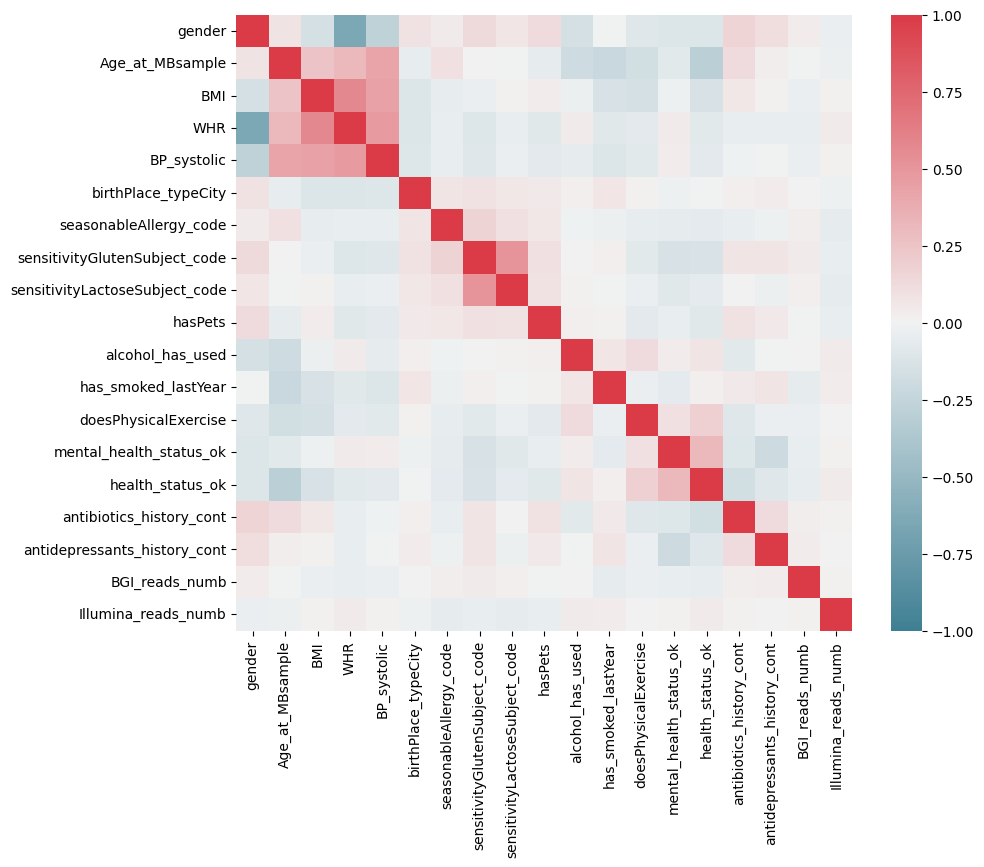

In [60]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = mrg.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

Text(0, 0.5, 'Age_at_MBsample')

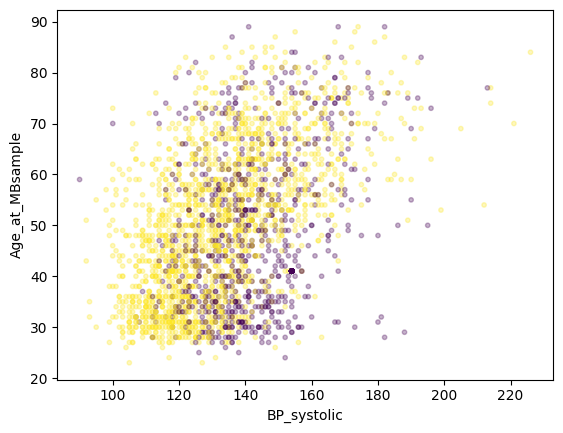

In [69]:
plt.scatter(mrg['BP_systolic'], mrg['Age_at_MBsample'], s=10, c=mrg['gender'], alpha=0.3)
plt.xlabel('BP_systolic')
plt.ylabel('Age_at_MBsample')

#plt.title('Reads number')
#plt.savefig('results/ReadsNumb_both_sets.png', dpi=300)